# Gauge the quality of the clusters produced - disaster corpus

In [1]:
import lib.reporter as reporter

c_v 0.594
c_npmi 0.0886
macro_time_coherence 1174006.9822486006
micro_time_coherence 143825.4968452203
Average document word count 59.611870595227984
Number of documents 23554
Latest record 1970-01-01T01:00:00.0000000Z
Earliest record 2020-07-01T09:21:00.0000000Z
Number of clusters 131
Median cluster size 14.0
Percent clustered docs 26.4


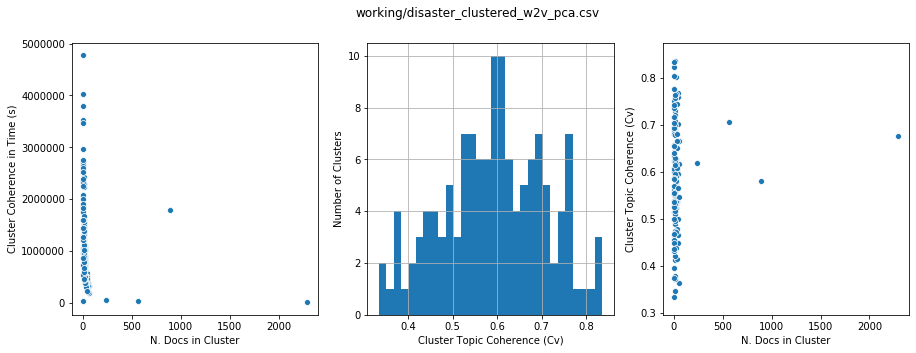

In [2]:
w2v_stats, w2v_coherences, w2v_topics_results = reporter.report_corpus_model_coherence("working/disaster_clustered_w2v_pca.csv")

for key, value in w2v_stats.items():
    if "examples" not in key:
        print (key, value)

In [3]:
for key, value in w2v_stats.items():
    if "examples" in key:
        print (key, value)

examples_best_performant [{'examples': [(0.06506126199694005, 'More torrential rain forecast after communities hit by flooding. Forecasters are warning of more heavy rain and thunderstorms after some parts of the country were hit by flooding. Two yellow weather warnings have been issued by the Met Office, covering much of southern and central England and Wales on Thursday.'), (0.06506126199694005, 'More torrential rain forecast after communities hit by flooding. Forecasters are warning of more heavy rain and thunderstorms after some parts of the country were hit by flooding. Two yellow weather warnings have been issued by the Met Office, covering much of southern and central England and Wales on Thursday.'), (0.06402809816518665, 'Met Office: Heavy rain and flood warnings forecast for UK. Heavy rain has been forecast for the UK. Parts of Scotland have been issued flood warnings, temperatures in the south will sit at around C.'), (0.06076000259182587, 'UK weather forecast: Britain faces

c_v 0.6046
c_npmi 0.0929
macro_time_coherence 556335.9446510379
micro_time_coherence 290173.4966901973
Average document word count 59.611870595227984
Number of documents 23554
Latest record 1970-01-01T01:00:00.0000000Z
Earliest record 2020-07-01T09:21:00.0000000Z
Number of clusters 199
Median cluster size 74.0
Percent clustered docs 100.0


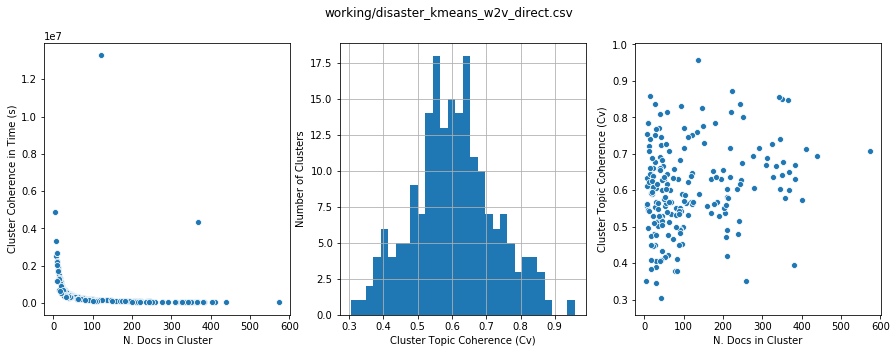

In [2]:
kmp_stats, kmp_coherences, kmp_topics_results = reporter.report_corpus_model_coherence("working/disaster_kmeans_w2v_direct.csv")

for key, value in kmp_stats.items():
    if "examples" not in key:
        print (key, value)

c_v 0.563
c_npmi 0.074
macro_time_coherence 1293362.5112487446
micro_time_coherence 121831.43596050028
Average document word count 59.611870595227984
Number of documents 23554
Latest record 1970-01-01T01:00:00.0000000Z
Earliest record 2020-07-01T09:21:00.0000000Z
Number of clusters 100
Median cluster size 11.0
Percent clustered docs 42.9


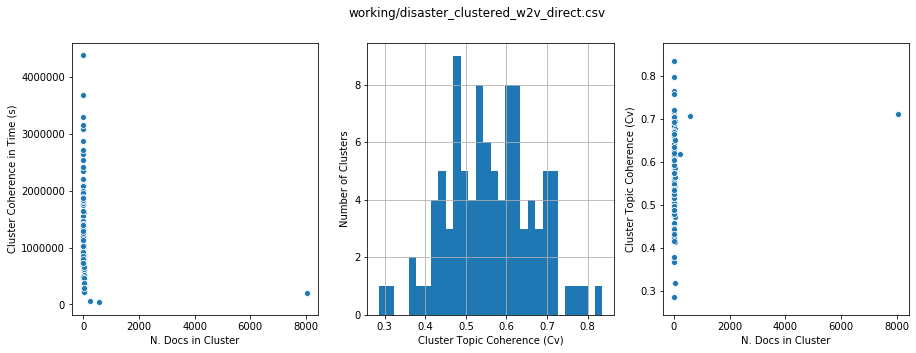

In [4]:
w2v_stats, w2v_coherences, w2v_topics_results = reporter.report_corpus_model_coherence("working/disaster_clustered_w2v_direct.csv")

for key, value in w2v_stats.items():
    if "examples" not in key:
        print (key, value)

c_v 0.607
c_npmi 0.0918
macro_time_coherence 497325.0227573975
micro_time_coherence 288374.46495119523
Average document word count 59.611870595227984
Number of documents 23554
Latest record 1970-01-01T01:00:00.0000000Z
Earliest record 2020-07-01T09:21:00.0000000Z
Number of clusters 197
Median cluster size 65.5
Percent clustered docs 99.9


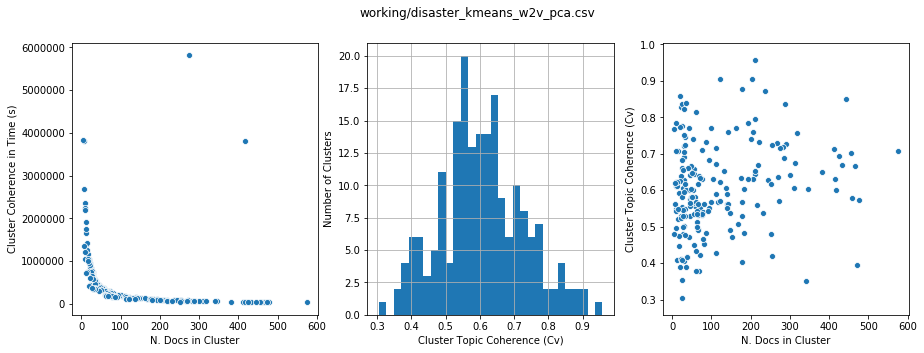

In [4]:
kmp_stats, kmp_coherences, kmp_topics_results = reporter.report_corpus_model_coherence("working/disaster_kmeans_w2v_pca.csv")

for key, value in kmp_stats.items():
    if "examples" not in key:
        print (key, value)

In [5]:
for key, value in kmp_stats.items():
    if "examples" in key:
        print (key, value)

examples_best_performant [{'examples': [(0.006779882857633519, 'Two singers die of coronavirus and 45 infected after choir met for rehearsal. A choir rehearsal amid the coronavirus outbreak led to at least 45 new cases of the disease and two deaths. Dozens of members of the Skagit Valley Chorale tested positive for Covid-1 after about 6 members the group’s 1-person choir met for practice on March 1 in Mount Vernon,'), (0.006722710897588845, 'Formula One season could be suspended until June due to coronavirus virus. Fourteen McLaren staff have been placed into quarantine after coming into contact with their infected colleague, who tested positive for the virus on Thursday night. All travelling members of Hamiltons Mercedes race team meanwhile, will not attend their HQ in Brackley over the next fortnight to avoid the potential of passing on a disease which ...'), (0.006686919042493688, 'Millions of Brits to be told to quarantine themselves at home for two weeks. Earlier, an NHS spokesman

## KEY MODEL

## KEY MODEL

c_v 0.6732
c_npmi 0.1321
macro_time_coherence 805871.9938949279
micro_time_coherence 138539.2054834014
Average document word count 59.611870595227984
Number of documents 23554
Latest record 1970-01-01T01:00:00.0000000Z
Earliest record 2020-07-01T09:21:00.0000000Z
Number of clusters 172
Median cluster size 8.0
Percent clustered docs 32.7


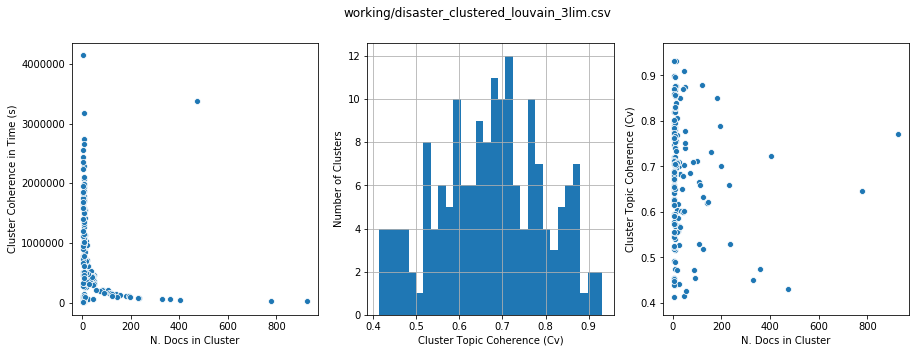

In [6]:
from importlib import reload
reload(reporter)
net3_stats, net3_coherences, net3_topics_results = reporter.report_corpus_model_coherence("working/disaster_clustered_louvain_3lim.csv")

for key, value in net3_stats.items():
    if "examples" not in key:
        print (key, value)

In [7]:
for key, value in net3_stats.items():
    if "examples" in key:
        print (key, value)

examples_best_performant [{'examples': [(0.08642321127785972, 'Cows survived Hurricane Dorian by swimming for miles. Three cows swept off an island during Hurricane Dorian have been found alive after apparently swimming for several miles. The cows, part of a herd on the US states Cedar Island, were swept away in September by a “mini tsunami” in North Carolina.'), (0.08396685498969476, 'Cows swept away by Hurricane Dorian found alive in North Carolina. Three cows swept off an island in North Carolina during Hurricane Dorian have been found alive after apparently swimming for several miles. The cows belong to a herd on the US states Cedar Island but were swept away in September by a quotmini tsunami ...'), (0.0799644362090103, 'Cows swept away by Hurricane Dorian found alive in North Carolina. Three cows swept off an island in North Carolina during Hurricane Dorian have been found alive after apparently swimming for several miles. The cows belong to a herd on the US states Cedar Island b